In [1]:
#importing libraries
import selenium
import pandas as pd
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.by import By



# Question 1

Write a python program which searches all the product under a particular product from www.amazon.in. The 
product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for 
guitars.

In [4]:
def search_amazon(product):
    # chrome browser to webdriver
    driver=webdriver.Chrome()

    # Load Amazon website
    driver.get("http://www.amazon.in/")

    #maximizing the window
    driver.maximize_window()
    
    # Find search box and input the product
    search_box = driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input")
    search_box.send_keys(product)
    search_click=driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input")
    search_click.click()


    # Wait for page to load
    sleep(2)

    # Find all product elements
    products = driver.find_elements(By.XPATH, '//div[@class="a-section a-spacing-base"]')

    # Extract and print information for each product
    for product in products:
        product_title = product.find_element(By.XPATH,'//span[@class="a-size-base-plus a-color-base a-text-normal"]').text
        try:
            product_price = product.find_element(By.XPATH, '//span[@class="a-price"]').text
        except:
            product_price = "Price not available"
        
        
        print("Product:", product_title)
        print("Price:", product_price)

        print()

#     # Quit WebDriver
    driver.quit()


In [5]:
if __name__ == "__main__":
    search_amazon("guitar")

Product: Kadence Frontier guitar with Online Guitar learning course , Wine Red Acoustic Guitar with Die Cast Keys, Set of Strings, Strap, Picks and Bag (Wine Red, Acoustic)
Price: ₹4,499

Product: Kadence Frontier guitar with Online Guitar learning course , Wine Red Acoustic Guitar with Die Cast Keys, Set of Strings, Strap, Picks and Bag (Wine Red, Acoustic)
Price: ₹4,499

Product: Kadence Frontier guitar with Online Guitar learning course , Wine Red Acoustic Guitar with Die Cast Keys, Set of Strings, Strap, Picks and Bag (Wine Red, Acoustic)
Price: ₹4,499

Product: Kadence Frontier guitar with Online Guitar learning course , Wine Red Acoustic Guitar with Die Cast Keys, Set of Strings, Strap, Picks and Bag (Wine Red, Acoustic)
Price: ₹4,499

Product: Kadence Frontier guitar with Online Guitar learning course , Wine Red Acoustic Guitar with Die Cast Keys, Set of Strings, Strap, Picks and Bag (Wine Red, Acoustic)
Price: ₹4,499

Product: Kadence Frontier guitar with Online Guitar learning

# Question 2

In the above question, now scrape the following details of each product listed in first 3 pages of your search 
results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then 
scrape all the products available under that product name. Details to be scraped are: "Brand 
Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and 
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“. 

In [121]:
product_title=[]
product_brand=[]
product_price=[]
return_exchange=[]
expected_delivery=[]
availability=[]
# Product_URL=[]


In [122]:
def search_amazon(product):
    # chrome browser to webdriver
    driver=webdriver.Chrome()

    # Load Amazon website
    driver.get("http://www.amazon.in/")

    #maximizing the window
    driver.maximize_window()
    
    # Find search box and input the product
    search_box = driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input")
    search_box.send_keys(product)
    search_click=driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input")
    search_click.click()


    # Wait for page to load
    sleep(1)


    # Find all product elements
    products=[]
    
#Iterating 3 pages # Find all product elements
    start=0
    end=3
    for i in range(start,end): 
        print("Scraping",i+1)
        #Scraping product urls
        for p in driver.find_elements(By.XPATH,'//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-4"]/a'):
            products.append(p.get_attribute('href'))
        next_button=driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/div[1]/div[1]/div/span[1]/div[1]/div[67]/div/div/span/a[3]')

    # Extract details for each product 

    for i in products:     #iterating each and every url to fetch full job details
        driver.get(i)             #taking each url one by one as an input
        sleep(1)
#  product_title 

        try:
            title = driver.find_element(By.XPATH,'//h1[@class="a-size-large a-spacing-none"]/span') 
            product_title.append(title.text)
        except: 
            product_title.append('-')
        
# product_brand 
        try:
            brand = driver.find_element(By.XPATH,'//td[@class="a-span9"]/span[1]') 
            product_brand.append(brand.text)
        except: 
            product_brand.append('-')
        
# product_price
        try:
            price = driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[4]/div[13]/div/div/div[4]/div[1]/span[2]/span[2]/span[2]') 
            product_price.append(price.text)
        except: 
            product_price.append('-')
        
#     return_exchange
        try:
            exchange = driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[4]/div[24]/div[2]/div/div/div/div[2]/div/ol/li[3]/div/span/div[2]/span') 
            return_exchange.append(exchange.text)
        except: 
            return_exchange.append('-')
        
        
#   expected_delivery 
        try:
            delivery = driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[4]/div/div[3]/div[10]/div[1]/div/div/div[1]/span/span') 
            expected_delivery.append(delivery.text)
        except: 
            expected_delivery.append('-')
        
        
#       availability 
        try:
            avail = driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[4]/div/div[5]/div/div[1]/span') 
            availability.append(avail.text)
        except: 
            availability.append('-')
    
  #  Product_URL      
#         Product_URL['URL'].append(products) 
#     # Quit WebDriver
    driver.quit()


In [133]:
if __name__ == "__main__":
search_amazon("guitar")

Scraping 1
Scraping 2
Scraping 3


In [134]:
len(product_title)

195

In [135]:
df = pd.DataFrame({"Title": product_title,"Brand Name": product_brand,"Price": product_price,"Return/Exchange": return_exchange,"Expected Delivery": expected_delivery,"Availability": availability})

In [136]:
df

,Title,Brand Name,Price,Return/Exchange,Expected Delivery,Availability
0,Kadence Frontier guitar with Online Guitar lea...,Kadence,-,7 days Replacement,"Sunday, 18 February",In stock
1,"Kadence rosewood Guitar Frontier Series, Elect...",Kadence,-,7 days Replacement,"Sunday, 18 February",In stock
2,Kadence Slowhand Premium Jumbo Semi Acoustic G...,Kadence,-,7 days Replacement,"Sunday, 18 February",In stock
3,Enya Nova Go Carbon Fiber Acoustic Guitar 1/2 ...,ENYA,-,7 days Replacement,"Sunday, 18 February",Only 1 left in stock.
4,"Intern INT-38C Right hand Acoustic Guitar Kit,...",Intern,-,7 days Replacement,"Sunday, 18 February",In stock
...,...,...,...,...,...,...
190,Yamaha FSX80C Semi acoustic cutaway guitar (na...,YAMAHA,-,-,-,-
191,"BLUEBERRY B-D38, Acoustic Guitar Kit Inbuilt T...",blueberry,-,7 days Replacement,"Tuesday, 20 February",In stock
192,chiransi String Acoustic Guitar // Learning To...,-,-,-,-,-
193,PS Signature 41inch PURE SEFALI WOOD Acoustic ...,PS Signature,-,-,"Wednesday, 21 February",Only 2 left in stock.


In [137]:
df.to_csv('filename.csv', index=False)

In [117]:
# ..............................................................................................................................

In [ ]:
# ..............................................................................................................................

# Question 3

Write a python program to access the search bar and search button on images.google.com and scrape 10 
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

***************************************** Machine Learning **************************************










***************************************** fruits **************************************










***************************************** cars **************************************










***************************************** Guitar **************************************










***************************************** Cakes **************************************











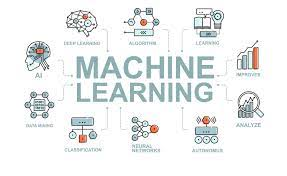
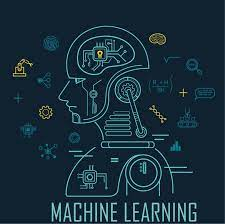
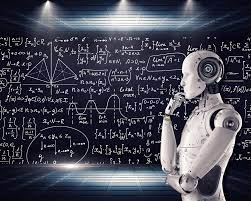
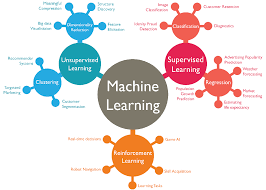
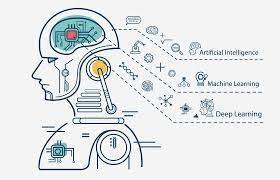
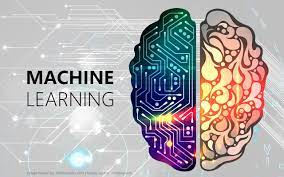
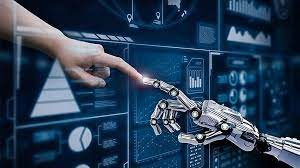
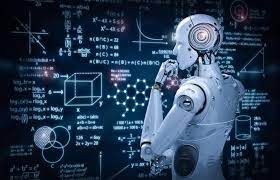
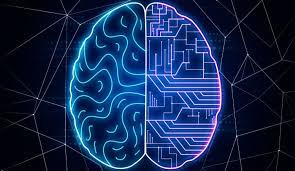
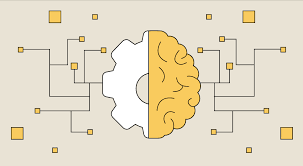
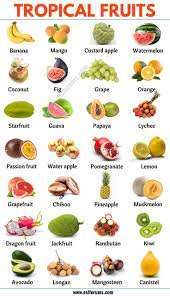
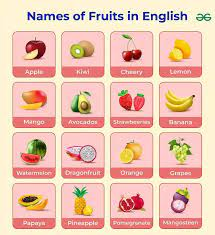
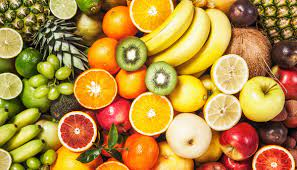
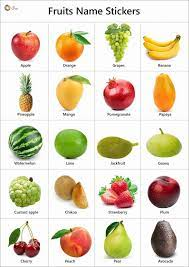
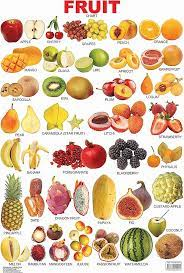
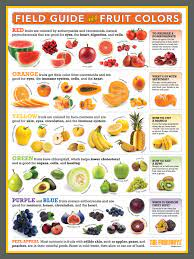
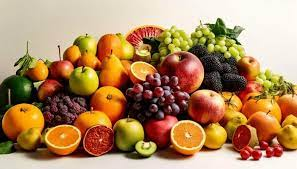
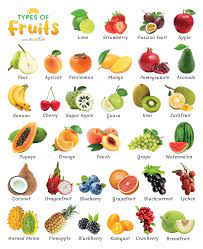
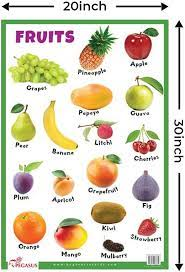
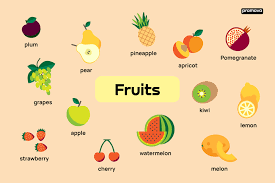
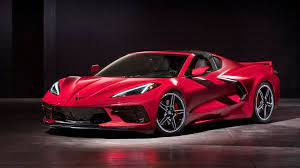
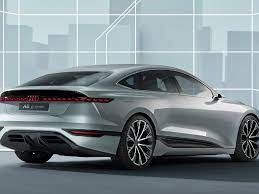
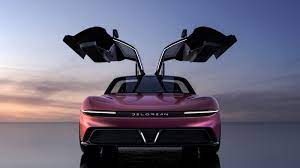
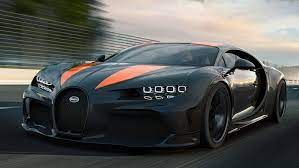
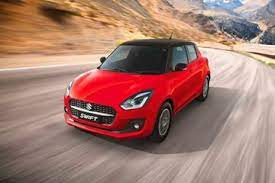
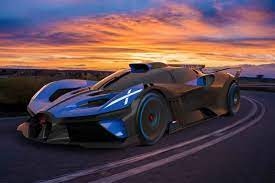
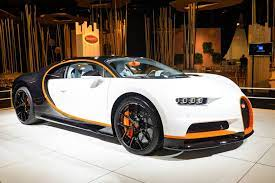
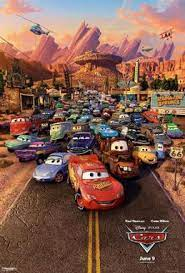
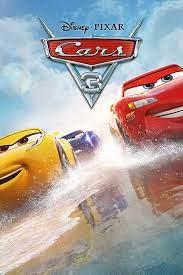
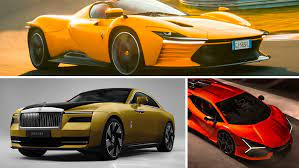
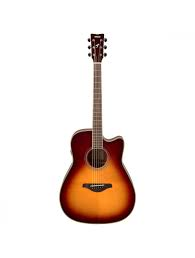
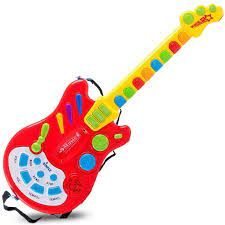
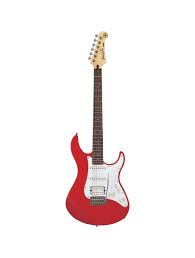
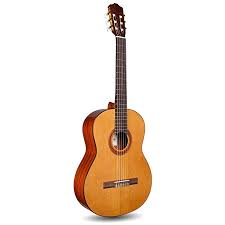
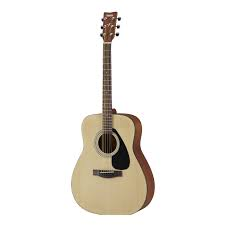
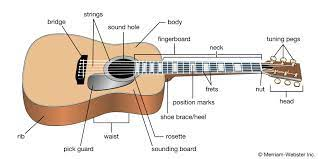
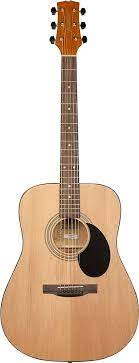
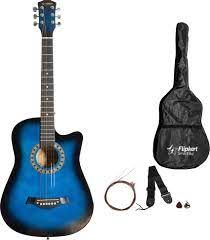
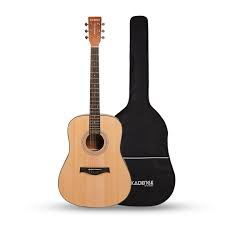
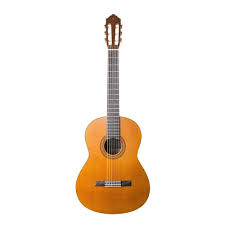
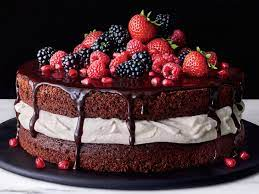
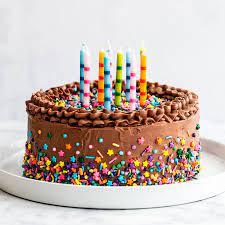
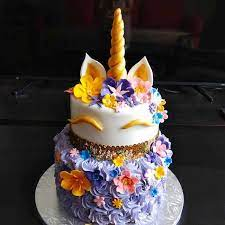
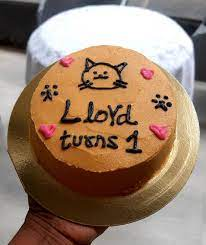
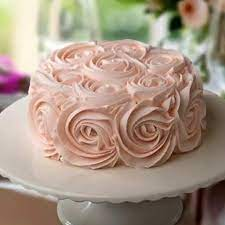
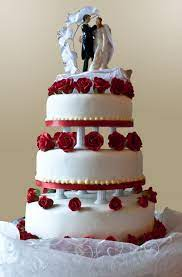
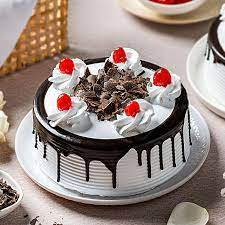
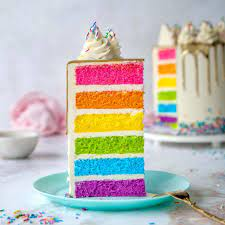
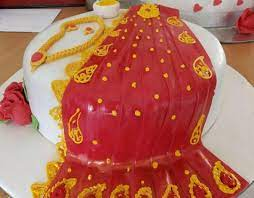
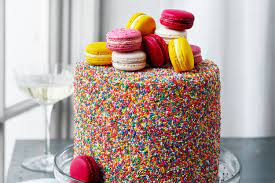

In [3]:
# # chrome browser to webdriver
driver = webdriver.Chrome()

#maximizing the window
driver.maximize_window()

# Load Google Images
driver.get('https://images.google.com')

# Keywords to search
keywords = [ 'Machine Learning','fruits','cars',  'Guitar', 'Cakes']

# Iterate over each keyword
for keyword in keywords:
    
    # Locate the search bar and input the keyword
    search_bar = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
    search_bar.send_keys(keyword)
      
        
    # Find the search button element and click it
    search_button = driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
    search_button.click()
    
    # Wait for images to load
    sleep(2)
    
    # keyword and their image URLs
    image_URLs = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    
#     print keyword
    print('*****************************************',keyword,'**************************************')
    
    # Scrape the image_URLs
    for image in image_URLs[:10]:
        print(image.get_attribute('src'))
        
        
  # Go back to the search page
    driver.execute_script("window.history.go(-1)")
    sleep(2)

# Close the browser
driver.quit()

# Question 4

Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com
and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand 
Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, 
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the 
details is missing then replace it by “- “. Save your results in a dataframe and CSV. 

In [6]:
# empty lists
Brand_Name=[]
Storage_RAM_ROM=[]
P_F_Camera=[]
Display_size_Resolution=[]
Warranty=[]
Battery=[]
Price=[]
Product_URL=[]

# chrome browser to webdriver
driver=webdriver.Chrome()

# Load Amazon website
driver.get("https://www.flipkart.com/")

#maximizing the window
driver.maximize_window()
    
# Find search box and input the product
search_box = driver.find_element(By.XPATH,"/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/div/input")
search_box.send_keys('smartphone Oneplus Nord pixel 4A ')

# Find the search button element and click it
search_click=driver.find_element(By.XPATH,"/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/div/input")
search_click.submit()

# scraping information about smartphones


#Brand_Name 

BName=driver.find_elements(By.XPATH,'//div[@class="col col-7-12"]/div[1]')
try:
    for i in BName:
        Brand_Name.append(i.text)
except:
    Brand_Name.append('-')


    
# Storage_RAM_ROM

Storage=driver.find_elements(By.XPATH,'//li[@class="rgWa7D"][1]')
try:
    for i in Storage:
        Storage_RAM_ROM.append(i.text)

except:
    Storage_RAM_ROM.append('-')       

    

# Display_size_Resolution
Display=driver.find_elements(By.XPATH,'//li[@class="rgWa7D"][2]')
try:
    for i in Display:
        Display_size_Resolution.append(i.text)

except:
    Display_size_Resolution.append('-')       


    
# P_F_Camera
Camera=driver.find_elements(By.XPATH,'//li[@class="rgWa7D"][3]')
try:
    for i in Camera:
        P_F_Camera.append(i.text)

except:
    P_F_Camera.append('-')       

    
    
# Battery
Battry=driver.find_elements(By.XPATH,'//li[@class="rgWa7D"][4]')
try:
    for i in Battry:
        Battery.append(i.text)

except:
    Battery.append('-')       




# Warranty
Warrnty=driver.find_elements(By.XPATH,'//li[@class="rgWa7D"][5]')
try:
    for i in Warrnty:
        Warranty.append(i.text)

except:
    Warranty.append('-') 
    
    
    
# Price

Prce=driver.find_elements(By.XPATH,'//div[@class="_3tbKJL"]/div/div[1]')
try:
    for i in Prce:
        Price.append(i.text)

except:
    Price.append('-') 
    

# Product_URL

Product=driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
try:
    for i in Product:
        Product_URL.append(i.get_attribute('href'))

except:
    Product_URL.append('-') 
    
    
    
# dataframe
df=pd.DataFrame({'Brand':Brand_Name,'Storage':Storage_RAM_ROM,'Camera':P_F_Camera,'Display size Resolution':Display_size_Resolution,'Warranty':Warranty,'Battery':Battery,'Price':Price,'Product URL':Product_URL})


In [8]:
# results saved in a dataframe and CSV file.
df
df.to_csv('Smartphones.csv', index=False)

,Brand,Storage,Camera,Display size Resolution,Warranty,Battery,Price,Product URL
0,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",8 GB RAM | 256 GB ROM,108MP Rear Camera,17.07 cm (6.72 inch) Display,Domestic Warranty of 12 months on phone & 6 mo...,5000 mAh Battery,"₹21,335",https://www.flipkart.com/oneplus-nord-ce-3-lit...
1,"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)",8 GB RAM | 128 GB ROM,64MP Rear Camera,16.33 cm (6.43 inch) Display,1 Year Warranty,4500 mAh Battery,"₹21,780",https://www.flipkart.com/oneplus-nord-ce-2-5g-...
2,"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)",8 GB RAM | 128 GB ROM,64MP Rear Camera,16.33 cm (6.43 inch) Display,1 Year Warranty,4500 mAh Battery,"₹21,395",https://www.flipkart.com/oneplus-nord-ce-2-5g-...
3,"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)",8 GB RAM | 128 GB ROM,64MP Rear Camera,16.33 cm (6.43 inch) Display,12 Month,4500 mAh Battery,"₹22,495",https://www.flipkart.com/oneplus-nord-ce-2-5g-...
4,"OnePlus Nord CE 5G (Blue Void, 128 GB)",8 GB RAM | 128 GB ROM,64MP Rear Camera,16.33 cm (6.43 inch) Display,1 Year Warranty,4500 mAh Battery,"₹27,999",https://www.flipkart.com/oneplus-nord-ce-5g-bl...
5,"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)",6 GB RAM | 128 GB ROM,64MP Rear Camera,16.33 cm (6.43 inch) Display,1 Year Warranty,4500 mAh Battery,"₹23,999",https://www.flipkart.com/oneplus-nord-ce-2-5g-...
6,"OnePlus N20 SE (JADE WAVE, 128 GB)",4 GB RAM | 128 GB ROM,50MP Rear Camera,16.66 cm (6.56 inch) Display,12 Month,5000 mAh Battery,"₹14,849",https://www.flipkart.com/oneplus-n20-se-jade-w...
7,"OnePlus N20 SE (BLUE OASIS, 64 GB)",4 GB RAM | 64 GB ROM,50MP Rear Camera,16.66 cm (6.56 inch) Display,No Warranty.,5000 mAh Battery,"₹13,739",https://www.flipkart.com/oneplus-n20-se-blue-o...
8,"OnePlus N20 SE (CELESTIAL BLACK, 64 GB)",4 GB RAM | 64 GB ROM,50MP Rear Camera,16.66 cm (6.56 inch) Display,No Warranty.,5000 mAh Battery,"₹14,990",https://www.flipkart.com/oneplus-n20-se-celest...
9,"OnePlus 10 Pro 5G (Emerald Forest, 128 GB)",8 GB RAM | 128 GB ROM,48MP Rear Camera,17.02 cm (6.7 inch) Display,1 year manufacturer warranty for device and 6 ...,5000 mAh Battery,"₹45,890",https://www.flipkart.com/oneplus-10-pro-5g-eme...


# Question 5

Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [7]:

# chrome browser to webdriver
driver=webdriver.Chrome()

# Load google maps
driver.get("https://www.google.co.in/maps")

#maximizing the window
driver.maximize_window()

sleep(3)

city = input('Enter City Name : ') 

# Find search box and input the product
search_box = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/form/input")
# search_box.clear() 
sleep(2)
search_box.send_keys(city)
search_click=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/div[1]/button/span")
search_click.click()

# Question 6

Write a program to scrap all the available details of best gaming laptops from digit.in.

In [14]:
Brand_Name=[]
Specification=[]
Price=[]
Description=[]

# chrome browser to webdriver
driver=webdriver.Chrome()

# Load google maps
driver.get("https://www.digit.in/top-products/best-gaming-laptops-40.html")

#maximizing the window
driver.maximize_window()

#  Brand_Name 

BName=driver.find_elements(By.XPATH,'//div[@class="rh_gr_top_middle mb10 colored_rate_bar"]/h3')
try:
    for i in BName:
        Brand_Name.append(i.text)
except:
    Brand_Name.append('-')

# Specification

Spec=driver.find_elements(By.XPATH,'//div[@class="cegg-no-top-margin cegg-list-logo-title"]')
try:
    for i in Spec:
        Specification.append(i.text)
except:
    Specification.append('-')
    
# Price

Prc=driver.find_elements(By.XPATH,'//div[@class="cegg-price-row"]/div[1]')
try:
    for i in Prc:
        Price.append(i.text)
except:
    Price.append('-')
    
# Description

Descr=driver.find_elements(By.XPATH,'//div[@class="post-inner-wrapper leftbarcalc"]/p')
try:
    for i in Descr:
        Description.append(i.text)
except:
    Description.append('-')

    

df=pd.DataFrame({'Brand_Name':Brand_Name,'Price':Price,'Specification':Specification,'Description':Description})

In [16]:
# results saved in a dataframe and CSV file.
df
df.to_csv('digitin_laptop.csv', index=False)

,Brand_Name,Price,Specification,Description
0,HP Omen 17-ck2008TX 13th Gen Core i7-13700HX,out of stock,"HP Omen 13th Gen Intel Core i7-13700HX,17.3 in...",We tested the HP OMEN 17 2023 at our digit tes...
1,MSI GT77 Titan 12UHS-054IN 12th Gen Core i9-12...,out of stock,"MSI Titan GT77, Intel 12th Gen. i9-12900HX, 43...",This laptop won our best performance award las...
2,Lenovo Legion 5i Pro 12th Gen Core i7-12700H (...,out of stock,"Lenovo Legion 5 Pro Intel Core i7-12700H 16"" (...",This Lenovo Legion 5i Pro gaming laptop hits t...
3,ASUS ROG Strix Scar 18 G834JZ-N5041WS 13th Gen...,"Rs. 289,990","ASUS ROG Strix Scar 18 (2023), Intel Core i9 1...",If a 17-inch display on a gaming laptop no lon...
4,Acer Predator Helios Neo 16 13th Gen Core i7-1...,"Rs. 154,000",Acer Predator Helios Neo 16 Gaming Laptop 13th...,The Acer Predator series of gaming laptops has...
5,ASUS ROG Zephyrus G14 Ryzen 9-6900HS (GA402RJZ...,out of stock,"ASUS ROG Zephyrus G14 (2022), 14.0-inch (35.56...","Another ASUS laptop makes it to our list, and ..."
6,MSI Cyborg 15 12th Gen Core i7-12650H (A12VF-2...,"Rs. 118,300","MSI Cyborg 15 A12VF-205IN, Intel 12th Gen. i7-...",One of the newest gaming laptop series from MS...


# Question 7

Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: 
“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [18]:
Rank=[]
Name=[]
Net_worth=[]
Age =[]
Citizenship=[]
Source=[]
Industry=[]


# chrome browser to webdriver
driver=webdriver.Chrome()

# Load google maps
driver.get("https://www.forbes.com/")

#maximizing the window
driver.maximize_window()

#finding and clicking to access "The Richest People In The World" page
search_box = driver.find_element(By.XPATH,"/html/body/div[1]/header/nav/div[1]/div[1]/div/div")
search_box.click()
search1_box = driver.find_element(By.XPATH,'//div[@role="button"]/span[1][1]')
search1_box.click()
search2_box = driver.find_element(By.XPATH,'//li[@class="TjJgrPSg _2bNo56RE secondary"]/a')
search2_box.click()

#Rank 

Rnk=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][1]/div')
try:
    for i in Rnk:
        Rank.append(i.text)
except:
    Rank.append('-')

#Name 

Nam=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][2]/div')
try:
    for i in Nam:
        Name.append(i.text)
except:
    Name.append('-')
    
#Net_worth 

worth=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][3]/div')
try:
    for i in worth:
        Net_worth.append(i.text)
except:
    Net_worth.append('-')
    
#Age 

age_no=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][4]/div')
try:
    for i in age_no:
        Age.append(i.text)
except:
    Age.append('-')
    

#Source 

Src=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][7]/div')
try:
    for i in Src:
        Source.append(i.text)
except:
    Source.append('-')

#Industry 

Indsty=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][6]/div')
try:
    for i in Indsty:
        Industry.append(i.text)
except:
    Industry.append('-')
    
    
# #Citizenship (199 records-value error)

# cty=driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]/div[5]')
# try:
#     for i in cty:
#         Citizenship.append(i.text)
# except:
#     Citizenship.append('-')

    
df=pd.DataFrame({'Rank':Rank,'Name':Name,'Net_worth':Net_worth,'Age':Age,'Source':Source,'Industry':Industry})

In [19]:
df

,Rank,Name,Net_worth,Age,Source,Industry
0,1,Bernard Arnault & family,$211 B,74,Fashion & Retail,LVMH
1,2,Elon Musk,$180 B,51,Automotive,"Tesla, SpaceX"
2,3,Jeff Bezos,$114 B,59,Technology,Amazon
3,4,Larry Ellison,$107 B,78,Technology,Oracle
4,5,Warren Buffett,$106 B,92,Finance & Investments,Berkshire Hathaway
...,...,...,...,...,...,...
195,195,Jin Baofang,$9.6 B,70,Energy,Solar panels
196,195,Luo Liguo & family,$9.6 B,67,Manufacturing,Chemicals
197,195,Marijke Mars,$9.6 B,58,Food & Beverage,"Candy, pet food"
198,195,Pamela Mars,$9.6 B,62,Food & Beverage,"Candy, pet food"


# Question 8

Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted 
from any YouTube Video

In [25]:
# chrome browser to webdriver
driver=webdriver.Chrome()

# Load google maps
driver.get("https://www.youtube.com/")

#maximizing the window
driver.maximize_window()


search_box = driver.find_element(By.XPATH,'//div[@class="ytd-searchbox-spt"]/input')
search_box.send_keys('song')
search_click=driver.find_element(By.XPATH,"/html/body/ytd-app/div[1]/div/ytd-masthead/div[4]/div[2]/ytd-searchbox/button/yt-icon")
search_click.click()
sleep(2)
search1_click=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-search-pyv-renderer[1]/div/ytd-ad-slot-renderer/div/ytd-in-feed-ad-layout-renderer/div/ytd-promoted-video-renderer/div/div/div[1]/a/div/div[1]/h3')
search1_click.click()


In [26]:
Comments=[]
Comment_upvote=[]
time=[]

# Comments
comnt=driver.find_elements(By.XPATH,'//div[@class="style-scope ytd-expander"]/yt-formatted-string[1]')
try:
    for i in comnt:
        Comments.append(i.text)
except:
    Comments.append('-')

# Comment_upvote
comnt_up=driver.find_elements(By.XPATH,'//span[@class="style-scope ytd-comment-action-buttons-renderer"][2]')
try:
    for i in comnt_up:
        Comment_upvote.append(i.text)
except:
    Comment_upvote.append('-')
    
# time
tim=driver.find_elements(By.XPATH,'//yt-formatted-string[@class="published-time-text style-scope ytd-comment-renderer"]/a')
try:
    for i in tim:
        time.append(i.text)
except:
    time.append('-')

In [28]:
df=pd.DataFrame({'Comments':Comments,'Comment_upvote':Comment_upvote,'time':time})

In [29]:
df

,Comments,Comment_upvote,time
0,ख़ुिशयाँ बटोर लो...,456,2 days ago
1,Ajay Devgn's performance is a testament to his...,101,2 days ago
2,Ajay Devgn's portrayal is both poignant and po...,2,2 hours ago
3,Ajay Devgn and Jyotika's chemistry in the elec...,2,2 hours ago
4,Ajay Devgn's performance is heartfelt and genu...,2,2 hours ago
...,...,...,...
695,Enlivening!,,2 hours ago
696,Unforgettable,,2 hours ago
697,A song that reminds us of the beauty of simpli...,3,1 day ago
698,Sensational!,,2 hours ago


# Question 9

Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in 
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall 
reviews,facilities and property description

In [3]:
# empty list
Names=[]
Ratingss=[]
Total_review=[]
Overall_reviewss=[]
Facilitiess=[]
Property_descriptions=[]

# chrome browser to webdriver
driver=webdriver.Chrome()

# Load google maps
driver.get("https://www.hostelworld.com/")

#maximizing the window
driver.maximize_window()

search_box = driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[1]/div/div[2]/input ')
search_box.send_keys('London')
sleep(2)

search1_click=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/ul/li[2]/button/div[2]')
search1_click.click()

# sleep(2)

search_click=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[5]/button[2]')
search_click.click()

sleep(2)

properties_URLs=[]
#Scraping product urls
for p in driver.find_elements(By.XPATH,'//div[@class="property-list"]/div/div/div[4]/div/a/a'):
    properties_URLs.append(p.get_attribute('href'))

sleep(7)

    
for i in properties_URLs:     #iterating each and every url to fetch full job details
        driver.get(i)             #taking each url one by one as an input
        sleep(1)
        
# # 1.Name
        try:
            title = driver.find_element(By.XPATH,'//div[@class="headline-container"]/div/h1/div') 
            Names.append(title.text)
        except: 
            Names.append('-')

# #2. Ratings
        try:
            Rating = driver.find_element(By.XPATH,'//section[@name="ms-page"]/div[8]/div/div/div[1]/div[1]') 
            Ratingss.append(Rating.text)
        except: 
            Ratingss.append('-')
            
# #3.Total_reviews
        try:
            Total_rev = driver.find_element(By.XPATH,'//section[@name="ms-page"]/div[8]/div/div/div[1]/div[1]') 
            Total_review.append(Total_rev.text)
        except: 
            Total_review.append('-')  

# #4.Overall_reviews
        try:
            Overall_rev = driver.find_element(By.XPATH,'//section[@name="ms-page"]/div[8]/div/div[1]/div[1]/div[2]/div[1]') 
            Overall_reviewss.append(Overall_rev.text)
        except: 
            Overall_reviewss.append('-')  


#5.Property_description
        try:
            descr = driver.find_element(By.XPATH,'//section[@name="ms-page"]/div[8]/div/div[2][1]//div//div/div[2]') 
            Property_descriptions.append(descr.text)
        except: 
            Property_descriptions.append('-') 

# #6.Facilities
        try:
            Facility = driver.find_element(By.XPATH,'//section[@name="ms-page"]/div[12]/div//ul/li[2]/ul/li[4]') 
            Facilitiess.append(Facility.text)
        except: 
            Facilitiess.append('-')



            


In [4]:
df=pd.DataFrame({'Name':Names,'Ratings':Ratingss,'Total_reviews':Total_review,'Overall_reviews':Overall_reviewss,'Facilities':Facilitiess,'Property_description':Property_descriptions})

In [5]:
df

,Name,Ratings,Total_reviews,Overall_reviews,Facilities,Property_description
0,Wombat's City Hostel London,9.1,9.1,Superb,Common Room,A safe haven in the middle of the metropolis: ...
1,Palmers Lodge - Swiss Cottage,8.8,8.8,Fabulous,Elevator,Palmers Lodge Swiss Cottage is set in what one...
2,St Christopher's Village,7.8,7.8,Very Good,Breakfast Not Included,Hostelworld visitors have said St Christopher'...
3,Urbany Hostel London,9.5,9.5,Superb,-,"Welcome to Urbany Hostel London, our first int..."
4,Onefam Notting Hill,9.6,9.6,Superb,Flexible NRR,The perfect place for solo travelers to connec...
5,Generator London,7.5,7.5,Very Good,Common Room,Hostelworld guests have said Generator Hostel ...
6,Onefam Waterloo,9.6,9.6,Superb,Adaptors,Come join us at our newest Onefam location in ...
7,Astor Hyde Park,8.2,8.2,Fabulous,Adaptors,Note: 18-40 yrs old only. Astor Hyde Park won ...
8,Safestay London Elephant & Castle,7.3,7.3,Very Good,Adaptors,Safestay at Elephant and Castle is located in ...
9,Astor Museum Inn,8.4,8.4,Fabulous,Adaptors,Note: 18-40 yrs old only. Astor Museum won 1st...


In [13]:
print('*'*127)
print('*****************************************************FlipnRobo*****************************************************************')
print('*'*127)

*******************************************************************************************************************************
*****************************************************FlipnRobo*****************************************************************
*******************************************************************************************************************************
